In [1]:
from multi_nutrient_model import mass_and_energy_constraints
import scipy.optimize as opt
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Glucose uptake and 

In [3]:
# Solve for non-0 steady state fluxes

# Set initial guess
#    vL, vG, vF, vK, vGL, vFK,  vLG, v0, vA, vR, vCO2 = v
v0 = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.1, 1.0, 1.0,]

# Solve for steady state fluxes
res = opt.fsolve(mass_and_energy_constraints, v0,)

# Print results
print('vL =', res[0])
print('vG =', res[1])
print('vF =', res[2])
print('vK =', res[3])
print('vGL =', res[4])
print('vFK =', res[5])
print('vLG =', res[6])
print('v0 =', res[7])
print('vA =', res[8])


vL = 0.013333333333333334
vG = 0.002437500000000003
vF = 0.005666666666666666
vK = 0.004
vGL = 0.01
vFK = 0.001
vLG = 0.003333333333333333
v0 = 0.007993055555555559
vA = 0.006666666666666666


In [4]:
# Check mass and energy balance
# Constaint names dLdt, dGdt, dFdt, dKdt, dGLY1, dR, dCO2, dE, dDF, dDL, dDK, dDG,  
names = ['dLdt', 'dGdt', 'dFdt', 'dKdt', 'dGLY1', 'dR', 'dCO2', 'dE', 'dDF', 'dDL', 'dDK',]
resisduals = mass_and_energy_constraints(res,)

# Print residuals
print('Residuals:')
for i in range(len(names)):
    print(names[i], ':', resisduals[i])
    

Residuals:
dLdt : 0.0
dGdt : 8.673617379884035e-19
dFdt : 1.734723475976807e-18
dKdt : 0.0
dGLY1 : 0.0
dR : 0.0
dCO2 : 0.0
dE : 0.0
dDF : -3.469446951953614e-18
dDL : 0.0
dDK : 0.0


In [5]:
# Mouse oxygen consumption from metabolic cage data

vO2_mL_per_min = 1.25 # mL/min

# 22.4 L/mol ideal gas
vO2_mmol_per_min = vO2_mL_per_min / 22.4 

# 25 g mouse
vO2_mmol_per_min_per_g = vO2_mmol_per_min / 25

vO2_nmol_per_min_per_g = vO2_mmol_per_min_per_g * 1e6


In [6]:
vO2_nmol_per_min_per_g

2232.1428571428573

In [7]:
5 * 4.1/25

0.82

In [8]:
# Scale the fluxes by vE -> ATP flux 

# ATP per O2 (3 per O)
PO2 = 5.0
# Whole body oxygen consumption rate ~ 2000 nmol/min/gBW
vO2 = 2000 * 0.7 
# ATP production rate
vATP = PO2 * vO2 
# Scale the oxygen fluxes by vE
vE = vATP 


In [9]:
# Print scaled fluxes in usiits of nmolC/min/gBW
print('Oxidation rates in mmumolC/min/gBW ')
print('vL =', res[0] * vE * 3 /1000 )
print('vG =', res[1] * vE * 6  / 1000 )
print('vF =', res[2] * vE * 16  /1000 ) 
print('vK =', res[3] * vE * 4 /1000 )

print('Catabolic and glycolytic rates')
print('vGL =', res[4] * vE * 6 / 1000 )
print('vFK =', res[5] * vE * 16 / 1000 )
print('vLG =', res[6] * vE * 6 / 1000 )

print('Anabolic rates')
print('v0 =', res[7] * vE * 6 / 1000 )
print('vA =', res[8] * vE * (3 * 16 )/ 1000 )
print('vR =', res[9] * vE * (3 * 16 )/ 1000 )

print('CO2 production rate')
print('vCO2 =', res[10] * vE / 1000)

Oxidation rates in mmumolC/min/gBW 
vL = 0.28
vG = 0.10237500000000013
vF = 0.6346666666666666
vK = 0.112
Catabolic and glycolytic rates
vGL = 0.42
vFK = 0.112
vLG = 0.14
Anabolic rates
v0 = 0.3357083333333335
vA = 2.24
vR = 1.493333333333333
CO2 production rate
vCO2 = 1.1290416666666667


In [10]:
print('vA =', res[8] * vE * (3)/ 1000 )
print('vR =', res[9] * vE * (3)/ 1000 )

vA = 0.14
vR = 0.09333333333333331


In [11]:
# Print scaled results
print('Oxidation rates in nmol/min/gBW ')
print('vL =', res[0] * vE )
print('vG =', res[1] * vE )
print('vF =', res[2] * vE )
print('vK =', res[3] * vE )

print('Catabolic and glycolytic rates')
print('vGL =', res[4] * vE )
print('vFK =', res[5] * vE )
print('vLG =', res[6] * vE )

print('Anabolic rates')
print('v0 =', res[7] * vE )
print('vA =', res[8] * vE )
print('vR =', res[9] * vE )

print('CO2 production rate')
print('vCO2 =', res[10] * vE  )


Oxidation rates in nmol/min/gBW 
vL = 93.33333333333334
vG = 17.06250000000002
vF = 39.666666666666664
vK = 28.0
Catabolic and glycolytic rates
vGL = 70.0
vFK = 7.0
vLG = 23.333333333333332
Anabolic rates
v0 = 55.951388888888914
vA = 46.666666666666664
vR = 31.111111111111104
CO2 production rate
vCO2 = 1129.0416666666667


In [12]:
# Print the non scaled values 
print('Fluxes in dimensionless units')
print('vL =', res[0] )
print('vG =', res[1] )
print('vF =', res[2] )
print('vK =', res[3] )  

print('vGL =', res[4]  )
print('vFK =', res[5] )
print('vLG =', res[6]  )        
print('v0 =', res[7]  )

Fluxes in dimensionless units
vL = 0.013333333333333334
vG = 0.002437500000000003
vF = 0.005666666666666666
vK = 0.004
vGL = 0.01
vFK = 0.001
vLG = 0.003333333333333333
v0 = 0.007993055555555559


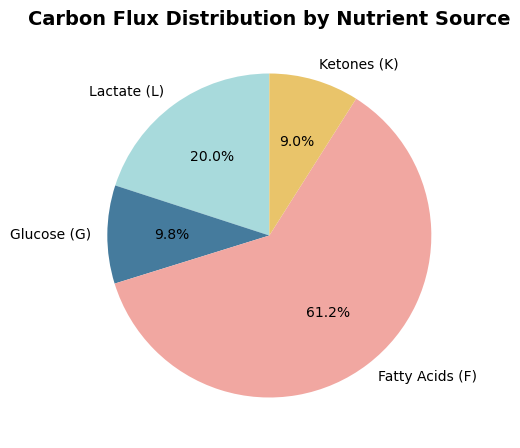

In [13]:
# Pie chart of the carbon fluxes 
labels = ['Lactate (L)', 'Glucose (G)', 'Fatty Acids (F)', 'Ketones (K)']
sizes = [res[0] * vE * 15, 
         res[1] * vE * 32 + res[4] * vE * 2, 
         res[2] * vE * 108,
         res[3] * vE * 22.5,
         ]
fig1, ax1 = plt.subplots(figsize=(5, 5))
# Soft, professional color palette
colors = ['#A8DADC', '#457B9D', '#F1A7A1', '#E9C46A']
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, 
        colors=colors)
ax1.set_title('Carbon Flux Distribution by Nutrient Source', fontsize=14, fontweight='bold')

# 30 percent that we can not account for - assumed to be conses 
plt.tight_layout()
plt.show()


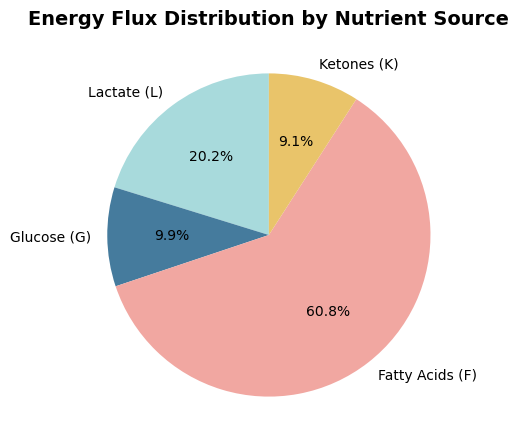

In [14]:
# Pie chart of the energy
labels = ['Lactate (L)', 'Glucose (G)', 'Fatty Acids (F)', 'Ketones (K)']
sizes = [res[0] * vE * 15, res[1] * vE * 32 + res[4] * vE * 2 , res[2] * vE * 106, res[3] * vE * 22.5,]
fig1, ax1 = plt.subplots(figsize=(5, 5))
# Soft, professional color palette (matching carbon chart)
colors = ['#A8DADC', '#457B9D', '#F1A7A1', '#E9C46A']
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=colors)
ax1.set_title('Energy Flux Distribution by Nutrient Source', fontsize=14, fontweight='bold')

# 30 percent that we can not account for - assumed to be conses 
plt.tight_layout()
plt.show()


In [15]:
# Plot Fcirc 
vL, vG, vF, vK, vGL, vFK,  vLG, v0, vA, vR, vCO2 = res * vE

vCO2/vO2

0.8064583333333334

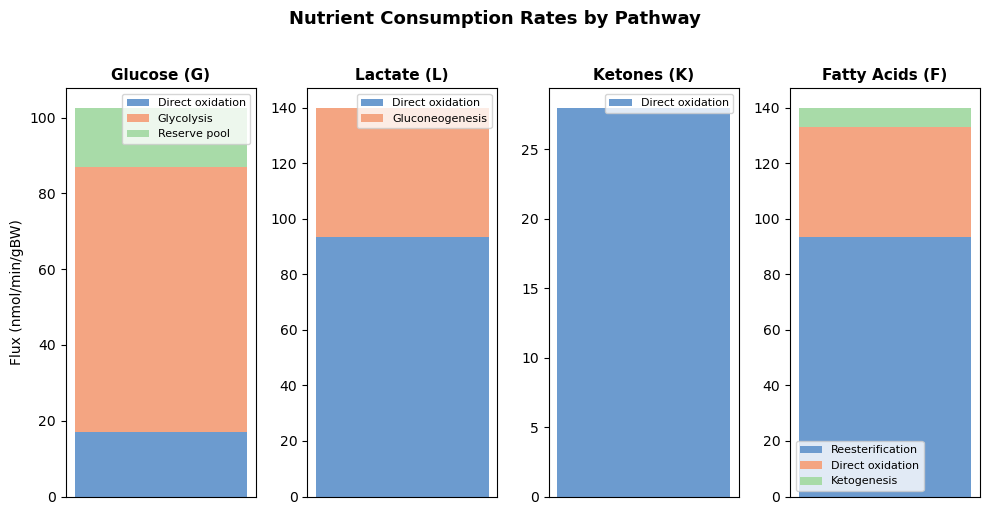

In [18]:
# Sum of consumption rates
FG  = [ vG , vGL , 0.5 *vR]
FL = [vL , 2*vLG]
FK = [vK]
FF = [3 * vR ,vF ,vFK]

f, ax = plt.subplots(1, 4, figsize=(10, 5))

# Soft color palette for stacked bars
color1 = '#6C9BCF'  # Soft blue
color2 = '#F4A582'  # Soft coral
color3 = '#A8DBA8'  # Soft green

# Stacked bar plot for Glucose consumption
ax[0].bar(0, FG[0], color=color1, label='Direct oxidation')
ax[0].bar(0, FG[1], bottom=FG[0], color=color2, label='Glycolysis')
ax[0].bar(0, FG[2], bottom=FG[0]+FG[1], color=color3, label='Reserve pool')
ax[0].set_xticks([])
ax[0].set_ylabel('Flux (nmol/min/gBW)', fontsize=10)
ax[0].set_title('Glucose (G)', fontsize=11, fontweight='bold')
ax[0].legend(fontsize=8)

# Lactate consumption
ax[1].bar(0, FL[0], color=color1, label='Direct oxidation')
ax[1].bar(0, FL[1], bottom=FL[0], color=color2, label='Gluconeogenesis')
ax[1].set_xticks([])
ax[1].set_title('Lactate (L)', fontsize=11, fontweight='bold')
ax[1].legend(fontsize=8)

# Ketone consumption
ax[2].bar(0, FK[0], color=color1, label='Direct oxidation')
ax[2].set_xticks([])
ax[2].set_title('Ketones (K)', fontsize=11, fontweight='bold')
ax[2].legend(fontsize=8)

# Fatty acid consumption
ax[3].bar(0, FF[0], color=color1, label='Reesterification')
ax[3].bar(0, FF[1], bottom=FF[0], color=color2, label='Direct oxidation')
ax[3].bar(0, FF[2], bottom=FF[0]+FF[1], color=color3, label='Ketogenesis')
ax[3].set_xticks([])
ax[3].set_title('Fatty Acids (F)', fontsize=11, fontweight='bold')
ax[3].legend(fontsize=8)

f.suptitle('Nutrient Consumption Rates by Pathway', fontsize=13, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


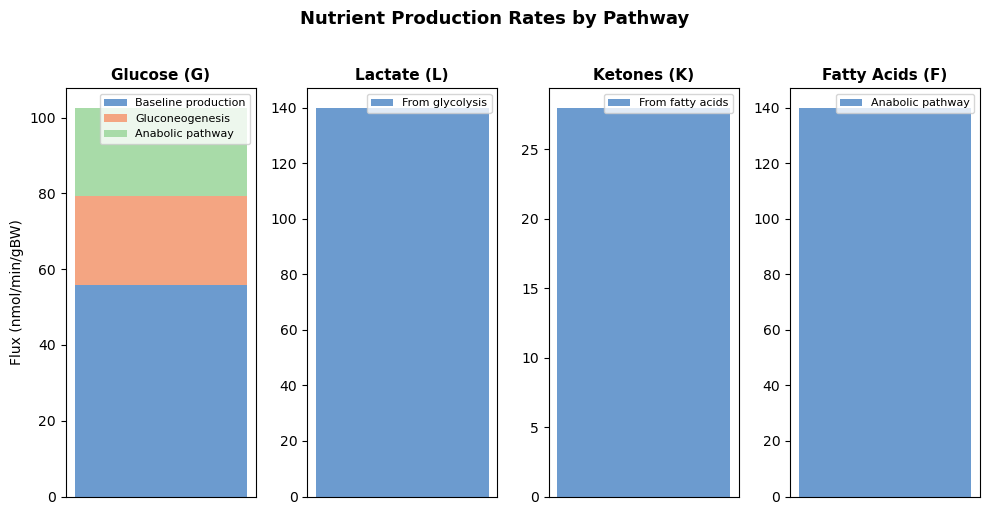

In [ ]:
# Sum of production rates
FG  = [ v0, vLG, 0.5 *vA]
FL = [2*vGL]
FK = [vFK * 4]
FF = [3 * vA]

f, ax = plt.subplots(1, 4, figsize=(10, 5))

# Soft color palette for stacked bars (matching consumption chart)
color1 = '#6C9BCF'  # Soft blue
color2 = '#F4A582'  # Soft coral
color3 = '#A8DBA8'  # Soft green

# Stacked bar plot for Glucose production
ax[0].bar(0, FG[0], color=color1, label='Baseline production')
ax[0].bar(0, FG[1], bottom=FG[0], color=color2, label='Gluconeogenesis')
ax[0].bar(0, FG[2], bottom=FG[0]+FG[1], color=color3, label='Anabolic pathway')
ax[0].set_xticks([])
ax[0].set_ylabel('Flux (nmol/min/gBW)', fontsize=10)
ax[0].set_title('Glucose (G)', fontsize=11, fontweight='bold')
ax[0].legend(fontsize=8)

# Lactate production
ax[1].bar(0, FL[0], color=color1, label='From glycolysis')
ax[1].set_xticks([])
ax[1].set_title('Lactate (L)', fontsize=11, fontweight='bold')
ax[1].legend(fontsize=8)

# Ketone production
ax[2].bar(0, FK[0], color=color1, label='From fatty acids')
ax[2].set_xticks([])
ax[2].set_title('Ketones (K)', fontsize=11, fontweight='bold')
ax[2].legend(fontsize=8)

# Fatty acid production
ax[3].bar(0, FF[0], color=color1, label='Lipolysis')
ax[3].set_xticks([])
ax[3].set_title('Fatty Acids (F)', fontsize=11, fontweight='bold')
ax[3].legend(fontsize=8)

f.suptitle('Nutrient Production Rates by Pathway', fontsize=13, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()
